In [1]:
# python
import sys
import os
import importlib
# columnar analysis
from coffea import processor
import awkward as ak
from dask.distributed import Client
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import ffschema, sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(ffschema)
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
sample = ["2Mu2E_100GeV_5GeV_400mm"]

fileset = utilities.make_fileset(sample, "ffntuple_v4")

runner = processor.Runner(
    #executor=processor.IterativeExecutor(),
    executor=processor.FuturesExecutor(),
    schema=ffschema.FFSchema,
    #maxchunks=1,
)

channels = ["looseBarrelE", "barrelE", "barrelE_ID-sigmaetaIeta", "barrelE_ID-DPhiIn", "barrelE_ID-EtaInSeed", "barrelE_ID-Inverse", "barrelE_ID-Iso", "barrelE_ID-ConversionVeto", "barrelE_ID-HE", "barrelE_ID-MissingHits"]  #"looseEndcapE" "endcapE", 
p = sidm_processor.SidmProcessor(
    channels,
    ["electron_extra"],
)

output = runner.run(fileset, treename="ffNtuplizer/ffNtuple", processor_instance=p)
out = output["out"]
hists = out["2Mu2E_100GeV_5GeV_400mm"]["hists"]

Output()

Output()

Not applying any cuts to the lepton jets for channel  looseBarrelE
Not applying any cuts to the lepton jets for channel  barrelE
Not applying any cuts to the lepton jets for channel  barrelE_ID-sigmaetaIeta
Not applying any cuts to the lepton jets for channel  barrelE_ID-DPhiIn
Not applying any cuts to the lepton jets for channel  barrelE_ID-EtaInSeed
Not applying any cuts to the lepton jets for channel  barrelE_ID-Inverse
Not applying any cuts to the lepton jets for channel  barrelE_ID-Iso
Not applying any cuts to the lepton jets for channel  barrelE_ID-ConversionVeto
Not applying any cuts to the lepton jets for channel  barrelE_ID-HE
Not applying any cuts to the lepton jets for channel  barrelE_ID-MissingHits
Not applying any cuts to the lepton jets for channel  looseBarrelE
Not applying any cuts to the lepton jets for channel  barrelE
Not applying any cuts to the lepton jets for channel  barrelE_ID-sigmaetaIeta
Not applying any cuts to the lepton jets for channel  barrelE_ID-DPhiIn


# |∆ηseed|:

tracking based variable, |∆η| between GSF track and supercluster seed.

                              ┌──────────────────────────────────────────────┐
[     -inf,         0) 0      │                                              │
[        0, 0.0001083) 29.66  │█████████████████████████████████████████████ │
[0.0001083, 0.0002167) 24.91  │█████████████████████████████████████▊        │
[0.0002167,  0.000325) 22.17  │█████████████████████████████████▋            │
[ 0.000325, 0.0004333) 23.57  │███████████████████████████████████▊          │
[0.0004333, 0.0005417) 25.84  │███████████████████████████████████████▎      │
[0.0005417,   0.00065) 14.56  │██████████████████████▏                       │
[  0.00065, 0.0007583) 5.436  │████████▎                                     │
[0.0007583, 0.0008667) 25.88  │███████████████████████████████████████▎      │
[0.0008667,  0.000975) 16.65  │█████████████████████████▎                    │
[ 0.000975,  0.001083) 9.538  │██████████████▌                               │
[ 0.001083,  0.001192) 8.65   │█████████████▏       

Hist(Regular(60, 0, 0.0065, name='electron_GsfEleDEtaInSeedCut'), storage=Weight()) # Sum: WeightedSum(value=325.148, variance=486.859) (WeightedSum(value=315.555, variance=747.644) with flow)

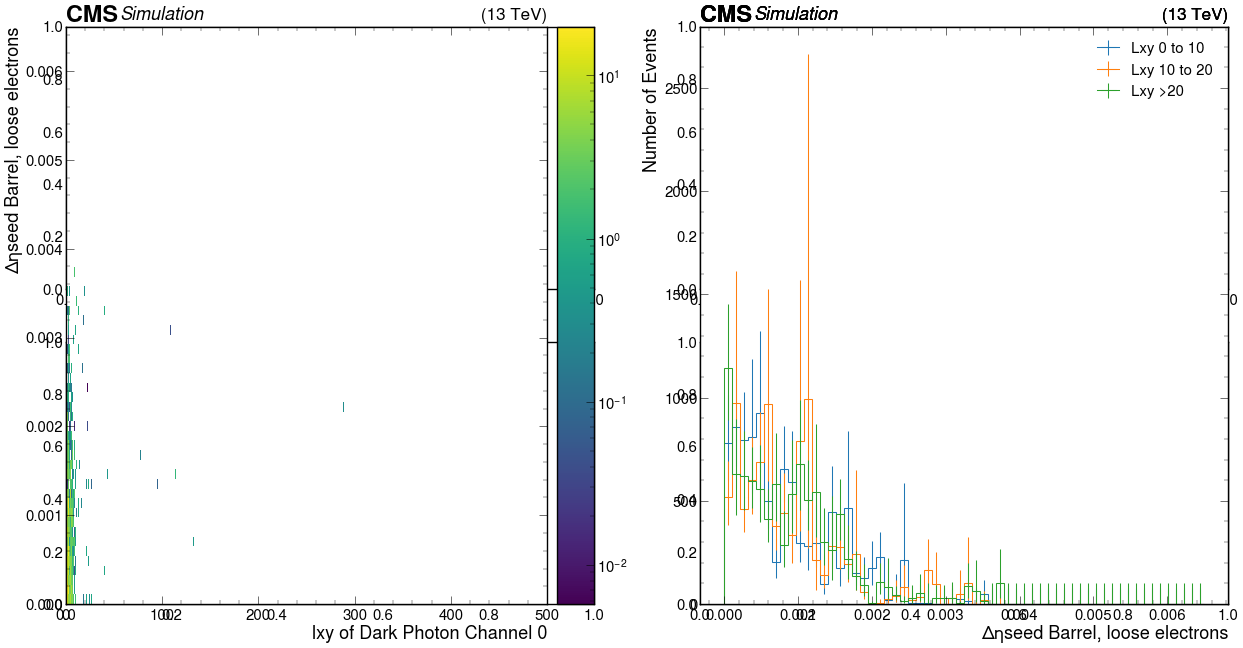

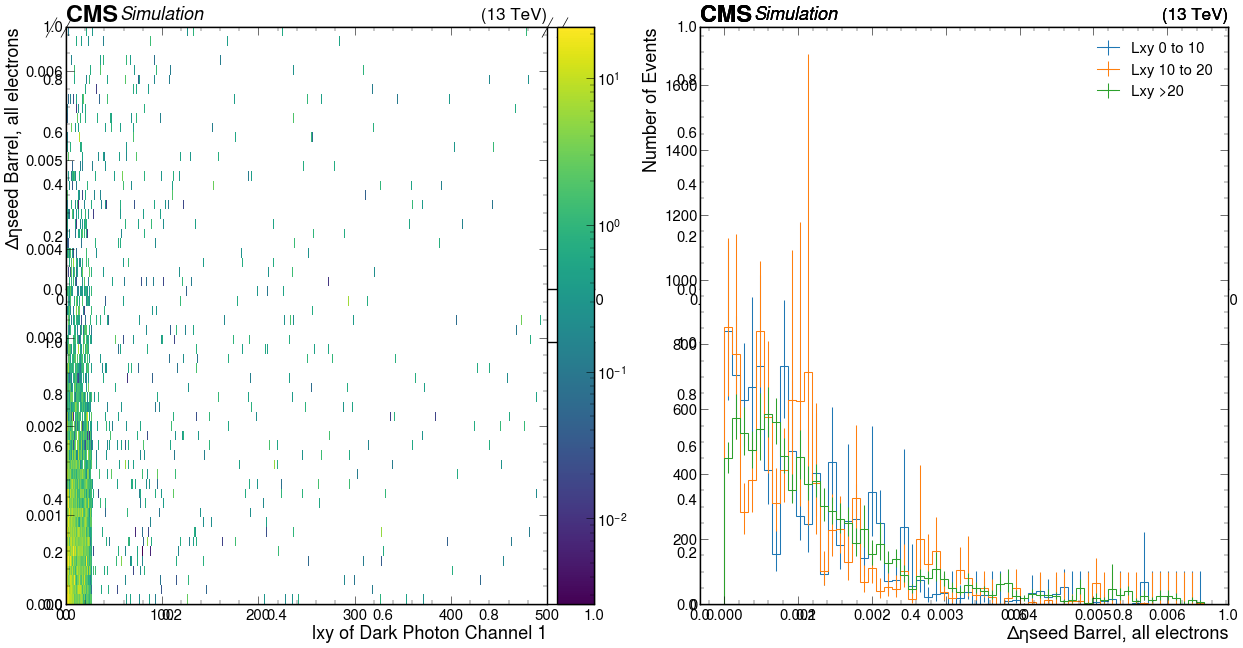

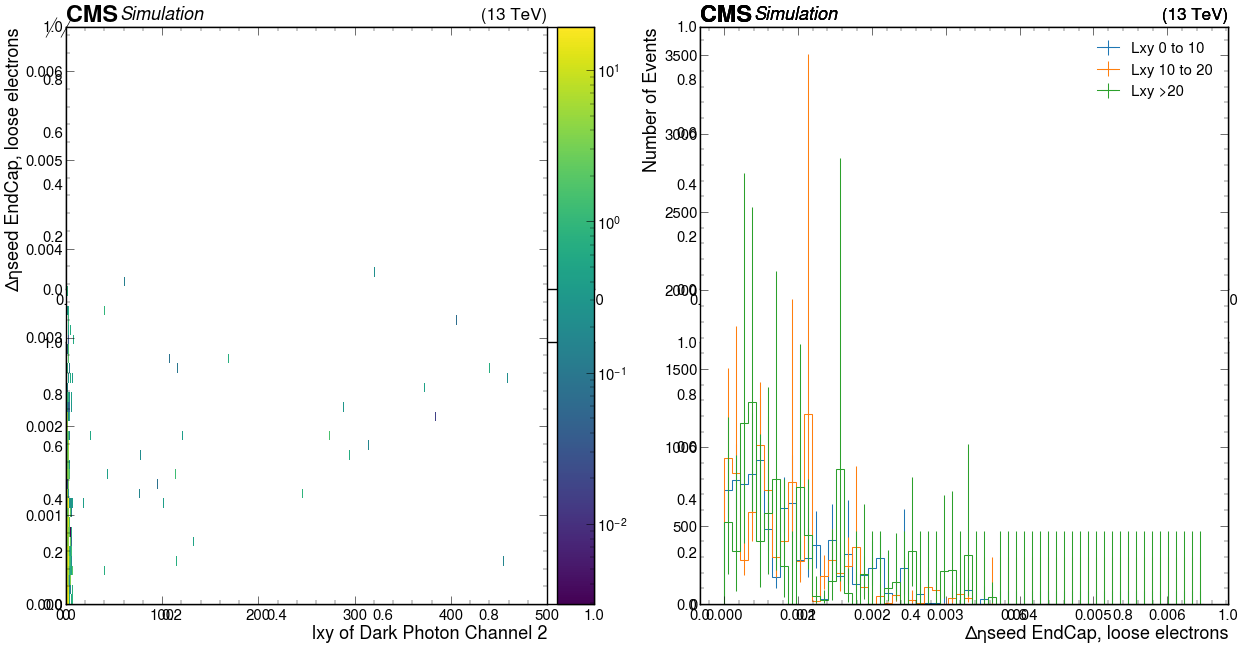

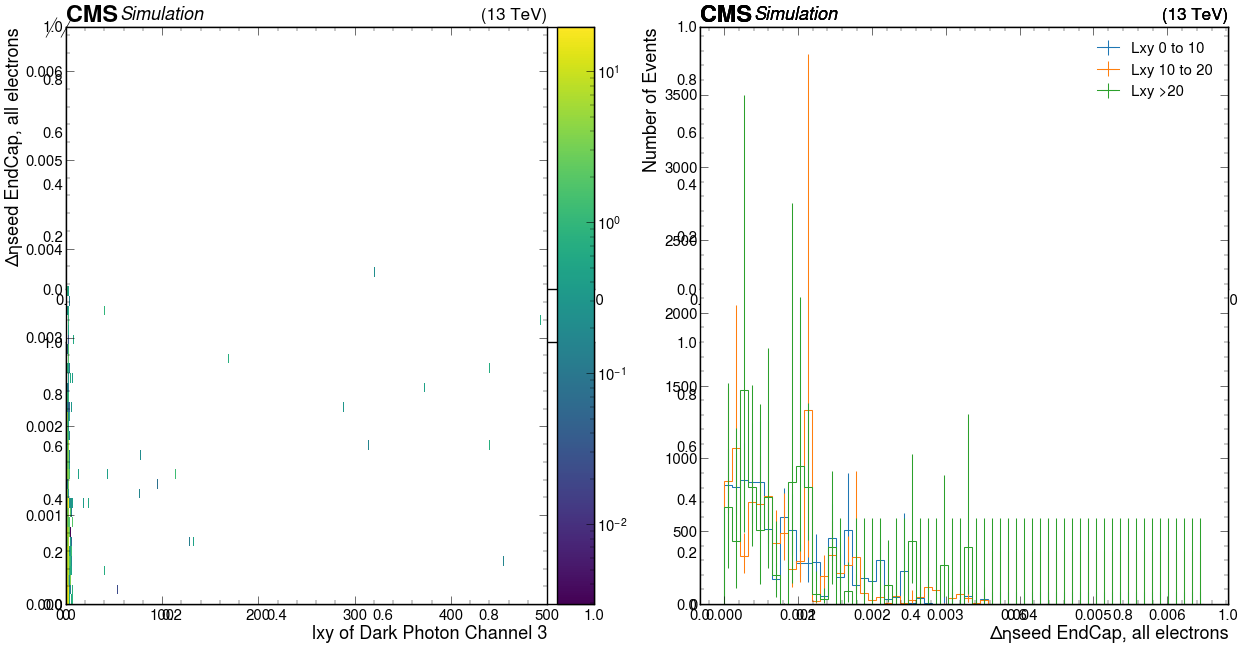

In [20]:
plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[0], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 0")
plt.ylabel("Δηseed Barrel, loose electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[0],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True,flow='none')
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[0],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True,flow='none')
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[0],slice(4,101, sum),:], label = "Lxy >20" ,density=True,flow='none')
plt.legend() 
#print(hists["electron_GsfEleDEtaInSeedCut2d"][channels[0],slice(0, 2, sum),:35]) 
plt.ylabel("Number of Events")
plt.xlabel("Δηseed Barrel, loose electrons")

plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[1], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("Δηseed Barrel, all electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[1],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True,flow='none')
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[1],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True,flow='none')
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[1],slice(4,101, sum),:], label = "Lxy >20" ,density=True,flow='none')
plt.legend()  
print(hists["electron_GsfEleDEtaInSeedCut2d"][channels[1],slice(0, 2, sum),:35]) 
plt.ylabel("Number of Events")
plt.xlabel("Δηseed Barrel, all electrons")

plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[2], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 2")
plt.ylabel("Δηseed EndCap, loose electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[2],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True,flow='none')
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[2],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True,flow='none')
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[2],slice(4,101, sum),:], label = "Lxy >20" ,density=True,flow='none')
plt.legend() 
#print(hists["electron_GsfEleDEtaInSeedCut2d"][channels[2],slice(0, 2, sum),:35]) 
plt.ylabel("Number of Events")
plt.xlabel("Δηseed EndCap, loose electrons")

plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[3], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 3")
plt.ylabel("Δηseed EndCap, all electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[3],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True,flow='none')
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[3],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True,flow='none')
utilities.plot(hists["electron_GsfEleDEtaInSeedCut2d"][channels[3],slice(4,101, sum),:], label = "Lxy >20" ,density=True,flow='none')
plt.legend() 
#print(hists["electron_GsfEleDEtaInSeedCut2d"][channels[3],slice(0, 2, sum),:35]) 
plt.ylabel("Number of Events")
plt.xlabel("Δηseed EndCap, all electrons")

(hists["electron_GsfEleDEtaInSeedCut2d"][channels[1],slice(0, 2, sum),:])

# |∆φin|:

tracking based variable, |∆φ| between GSF track and supercluster.

                              ┌──────────────────────────────────────────────┐
[    -inf,        0) 0        │                                              │
[       0, 0.001125) 56.22    │        █████████████████████████████▊        │
[0.001125,  0.00225) 70.59    │        █████████████████████████████████████▍│
[ 0.00225, 0.003375) 34.59    │        ██████████████████▍                   │
[0.003375,   0.0045) 23.31    │        ████████████▍                         │
[  0.0045, 0.005625) 22.3     │        ███████████▊                          │
[0.005625,  0.00675) 18.87    │        ██████████                            │
[ 0.00675, 0.007875) 12.12    │        ██████▍                               │
[0.007875,    0.009) 14.79    │        ███████▉                              │
[   0.009,  0.01012) 9.231    │        ████▉                                 │
[ 0.01012,  0.01125) 3.371    │        █▊                                    │
[ 0.01125,  0.01237) 7.882    │        ████▏        

Hist(Regular(80, 0, 0.09, name='electron_GsfEleDPhiInCut'), storage=Weight()) # Sum: WeightedSum(value=241.675, variance=369.687)

/opt/conda/lib/python3.9/site-packages/IPython/core/events.py:82: UserWarning: Glyph 8710 (\N{INCREMENT}) missing from current font.
  func(*args, **kwargs)
/opt/conda/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 8710 (\N{INCREMENT}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


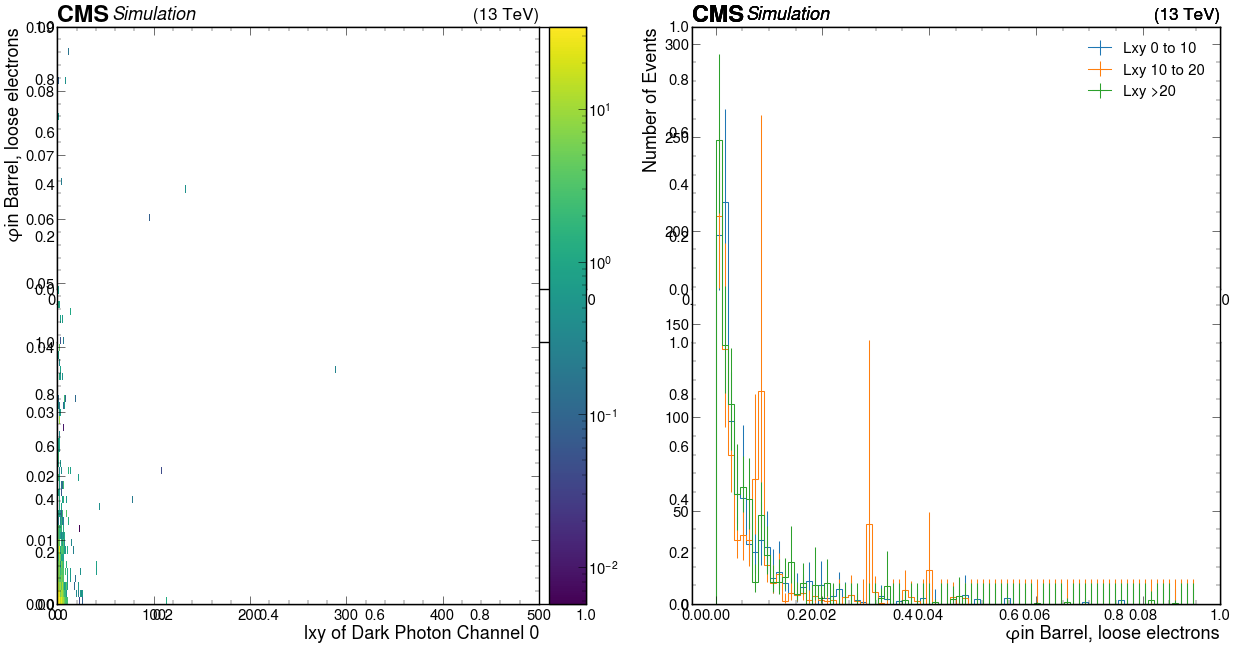

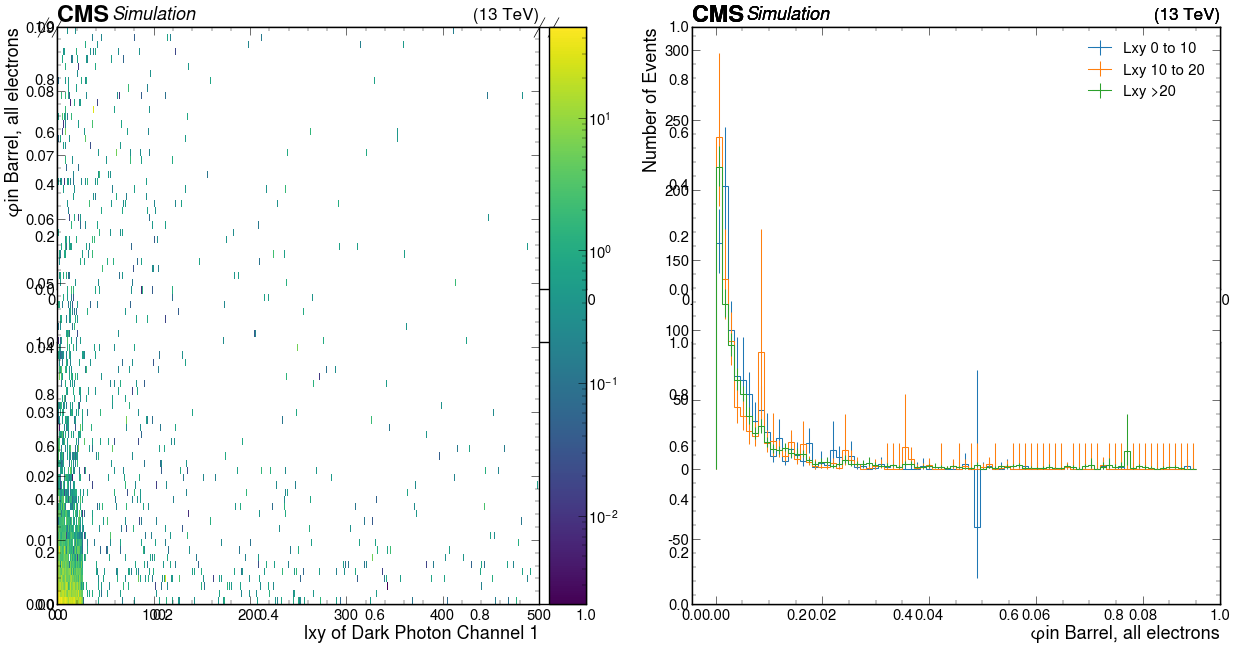

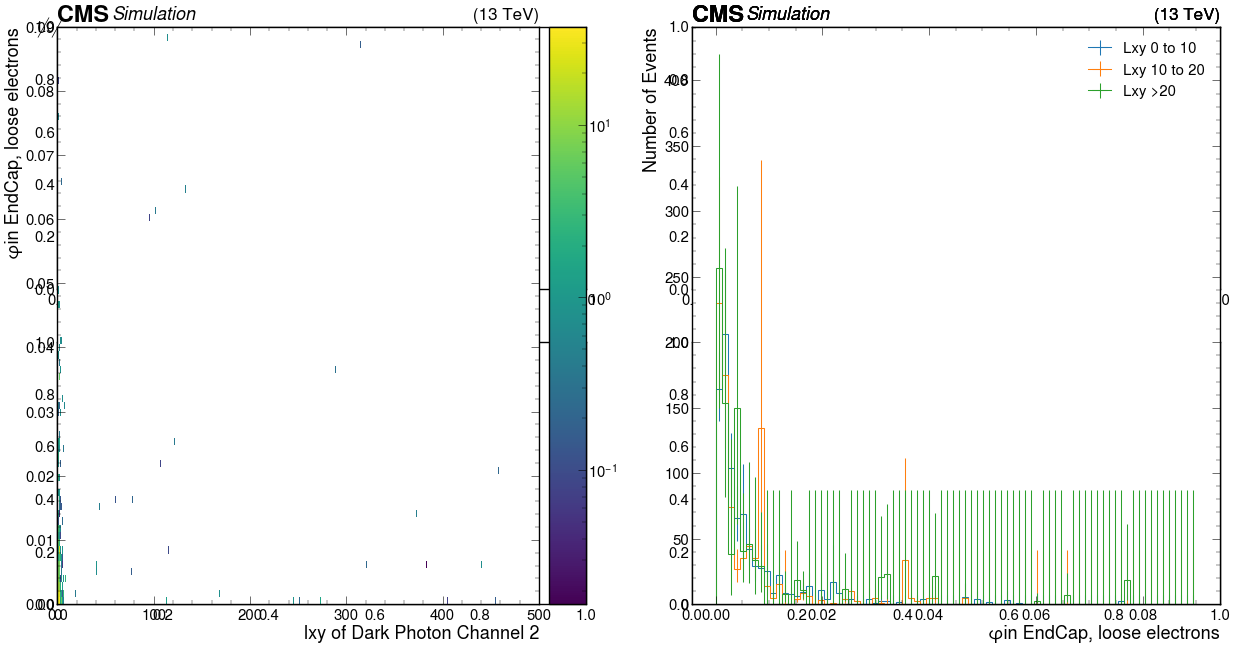

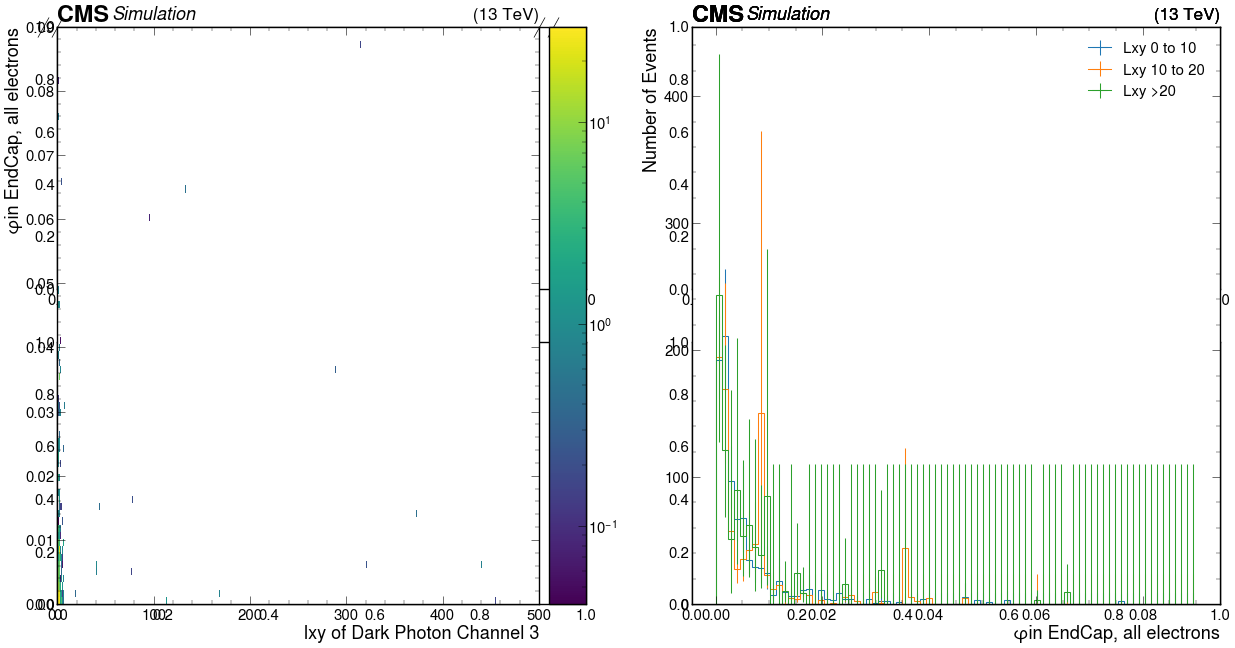

In [4]:
plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[0], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 0")
plt.ylabel("∆φin Barrel, loose electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[0],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True,flow='none')
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[0],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True,flow='none')
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[0],slice(4,101, sum),:], label = "Lxy >20" ,density=True,flow='none')
plt.legend()
#print(hists["electron_GsfEleDPhiInCut2d"][channels[0],slice(0, 2, sum),:76]) 
plt.ylabel("Number of Events")
plt.xlabel("∆φin Barrel, loose electrons")

plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[1], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("∆φin Barrel, all electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[1],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True,flow='none')
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[1],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True,flow='none')
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[1],slice(4,101, sum),:], label = "Lxy >20" ,density=True,flow='none')
plt.legend()  
print(hists["electron_GsfEleDPhiInCut2d"][channels[1],slice(0, 2, sum),:76]) 
plt.ylabel("Number of Events")
plt.xlabel("∆φin Barrel, all electrons")

plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[2], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 2")
plt.ylabel("∆φin EndCap, loose electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[2],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True,flow='none')
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[2],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True,flow='none')
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[2],slice(4,101, sum),:], label = "Lxy >20" ,density=True,flow='none')
plt.legend() 
#print(hists["electron_GsfEleDPhiInCut2d"][channels[2],slice(0, 2, sum),:76]) 
plt.ylabel("Number of Events")
plt.xlabel("∆φin EndCap, loose electrons")

plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[3], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 3")
plt.ylabel("∆φin EndCap, all electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[3],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True,flow='none')
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[3],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True,flow='none')
utilities.plot(hists["electron_GsfEleDPhiInCut2d"][channels[3],slice(4,101, sum),:], label = "Lxy >20" ,density=True,flow='none')
plt.legend() 
#print(hists["electron_GsfEleDPhiInCut2d"][channels[3],slice(0, 2, sum),:76]) 
plt.ylabel("Number of Events")
plt.xlabel("∆φin EndCap, all electrons")


(hists["electron_GsfEleDPhiInCut2d"][channels[0],slice(0, 2, sum),:])

# |1/E - 1/𝒑|: 

absolute value of the difference between the ECAL supercluster energy inverse and the GSF track momentum inverse.

                           ┌─────────────────────────────────────────────────┐
[   -inf,       0) 0       │                                                 │
[      0, 0.00375) 245.5   │████████████████████████████████████████████████ │
[0.00375,  0.0075) 23.76   │████▋                                            │
[ 0.0075, 0.01125) 15.58   │███                                              │
[0.01125,   0.015) 8.499   │█▋                                               │
[  0.015, 0.01875) 3.869   │▊                                                │
[0.01875,  0.0225) 0.7002  │▏                                                │
[ 0.0225, 0.02625) 0.8178  │▏                                                │
[0.02625,    0.03) 2.416   │▌                                                │
[   0.03, 0.03375) 1.558   │▎                                                │
[0.03375,  0.0375) 1.563   │▎                                                │
[ 0.0375, 0.04125) 0.8102  │▏                       

Hist(Regular(80, 0, 0.3, name='electron_GsfEleEInverseMinusPInverseCut'), storage=Weight()) # Sum: WeightedSum(value=241.675, variance=369.687)

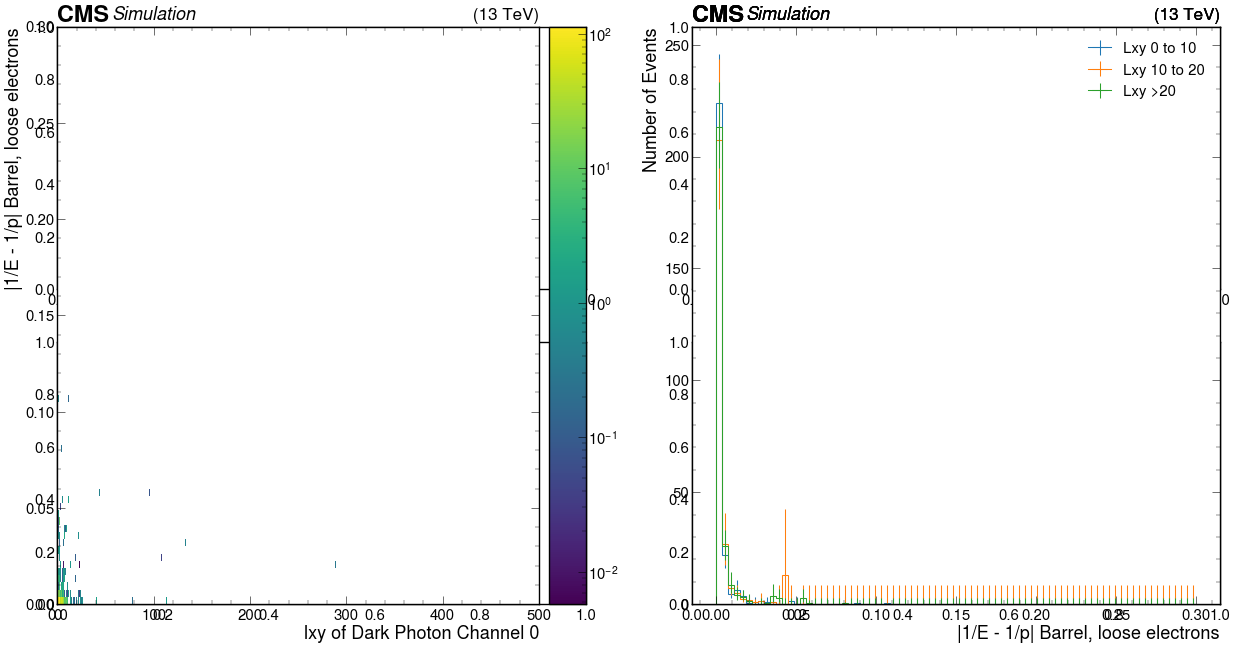

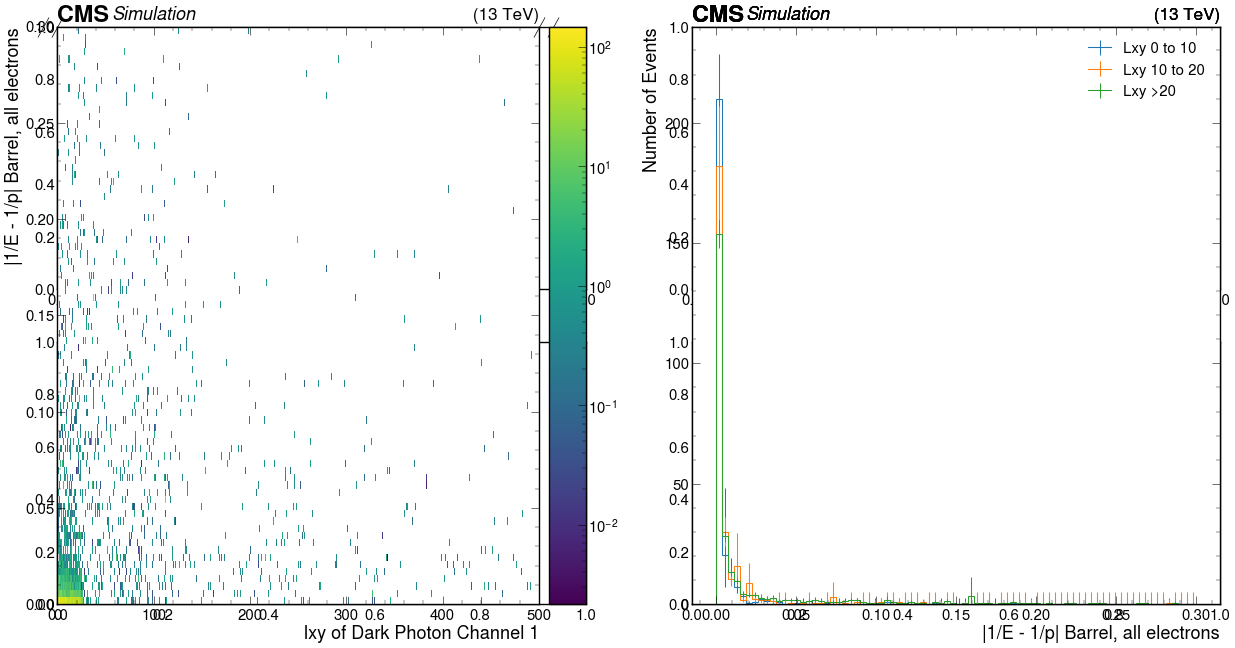

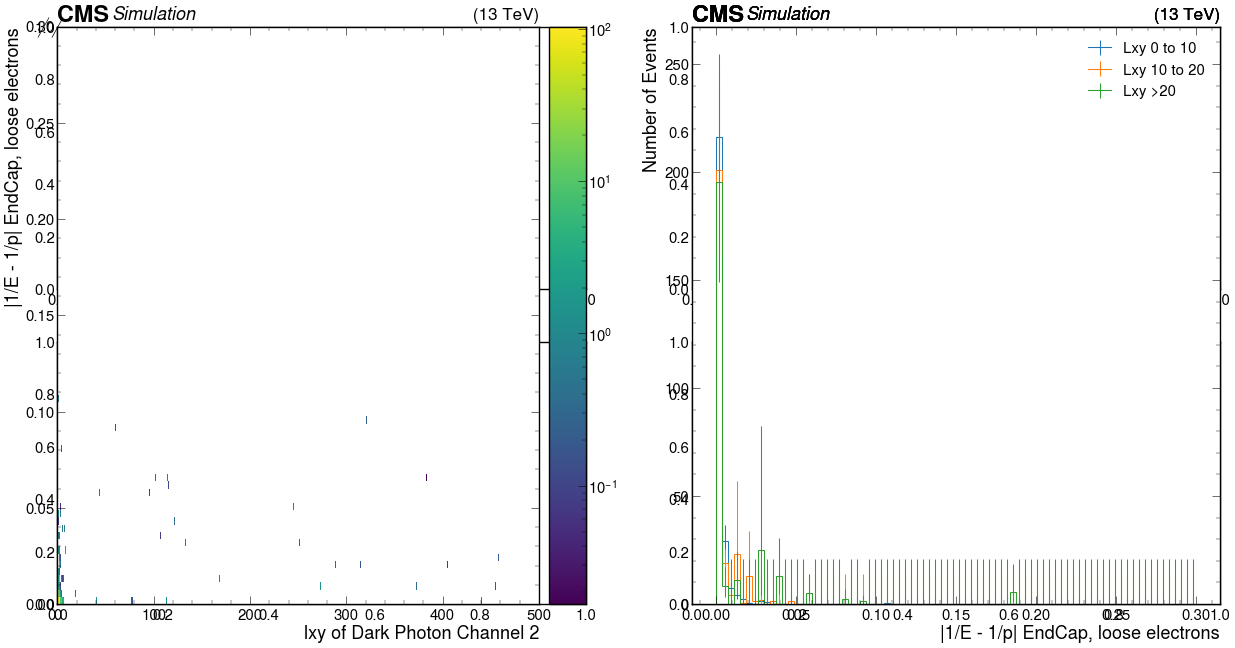

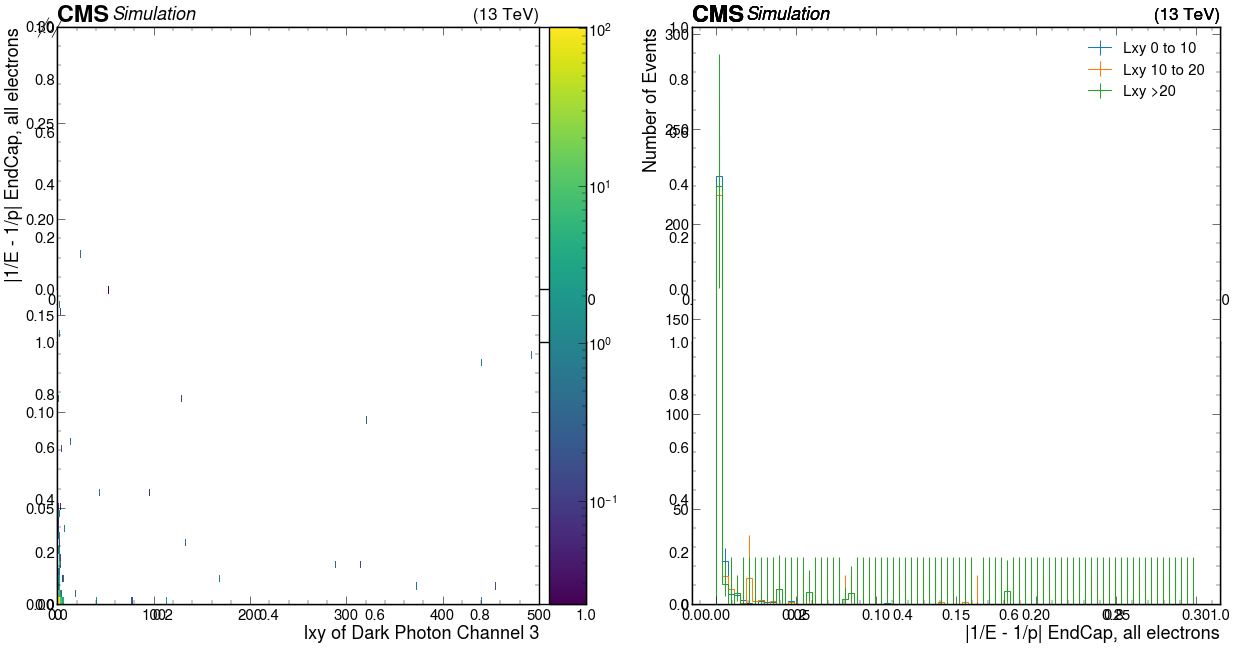

In [5]:
plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[0], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 0")
plt.ylabel("|1/E - 1/p| Barrel, loose electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[0],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True,flow='none')
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[0],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True,flow='none')
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[0],slice(4,101, sum),:], label = "Lxy >20" ,density=True,flow='none')
plt.legend()
#print(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[0],slice(0, 2, sum),:53]) 
plt.ylabel("Number of Events")
plt.xlabel("|1/E - 1/p| Barrel, loose electrons")

plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[1], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("|1/E - 1/p| Barrel, all electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[1],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True,flow='none')
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[1],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True,flow='none')
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[1],slice(4,101, sum),:], label = "Lxy >20" ,density=True,flow='none')
plt.legend()  
print(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[1],slice(0, 2, sum),:53]) 
plt.ylabel("Number of Events")
plt.xlabel("|1/E - 1/p| Barrel, all electrons")

plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[2], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 2")
plt.ylabel("|1/E - 1/p| EndCap, loose electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[2],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True,flow='none')
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[2],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True,flow='none')
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[2],slice(4,101, sum),:], label = "Lxy >20" ,density=True,flow='none')
plt.legend() 
#print(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[2],slice(0, 2, sum),:53]) 
plt.ylabel("Number of Events")
plt.xlabel("|1/E - 1/p| EndCap, loose electrons")

plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[3], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 3")
plt.ylabel("|1/E - 1/p| EndCap, all electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[3],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True,flow='none')
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[3],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True,flow='none')
utilities.plot(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[3],slice(4,101, sum),:], label = "Lxy >20" ,density=True,flow='none')
plt.legend() 
#print(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[3],slice(0, 2, sum),:53]) 
plt.ylabel("Number of Events")
plt.xlabel("|1/E - 1/p| EndCap, all electrons")


(hists["electron_GsfEleEInverseMinusPInverseCut2d"][channels[0],slice(0, 2, sum),:])

# Isolation:
relative isolation value with effective area corrections. It is calculated by considering all PFCandidates whose distance to the electron in question satisfies ∆R < 0.3 in the (η, φ) plane:

Iso = (Isoch + Isonh + Isopho)/pT

                     ┌───────────────────────────────────────────────────────┐
[ -inf,     0) 667.1 │████████████████████████████▍                          │
[    0, 0.005) 49.01 │██▏                                                    │
[0.005,  0.01) 40.5  │█▊                                                     │
[ 0.01, 0.015) 36.12 │█▌                                                     │
[0.015,  0.02) 28.51 │█▎                                                     │
[ 0.02, 0.025) 16.89 │▊                                                      │
[0.025,  0.03) 17.08 │▊                                                      │
[ 0.03, 0.035) 21.21 │▉                                                      │
[0.035,  0.04) 30.34 │█▎                                                     │
[ 0.04, 0.045) 34.27 │█▌                                                     │
[0.045,  0.05) 21.32 │▉                                                      │
[ 0.05, 0.055) 16.99 │▊                             

Hist(Regular(40, 0, 0.2, name='electron_GsfEleRelPFIsoScaledCut'), storage=Weight()) # Sum: WeightedSum(value=99.2163, variance=196.125) (WeightedSum(value=241.675, variance=369.687) with flow)

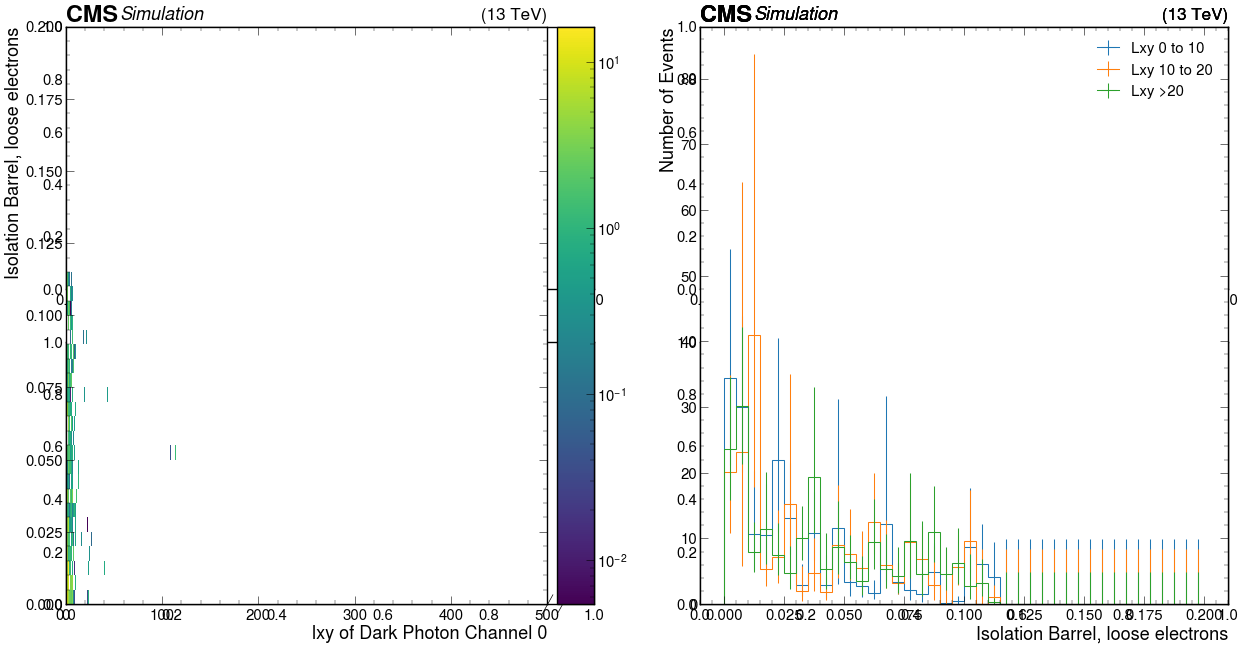

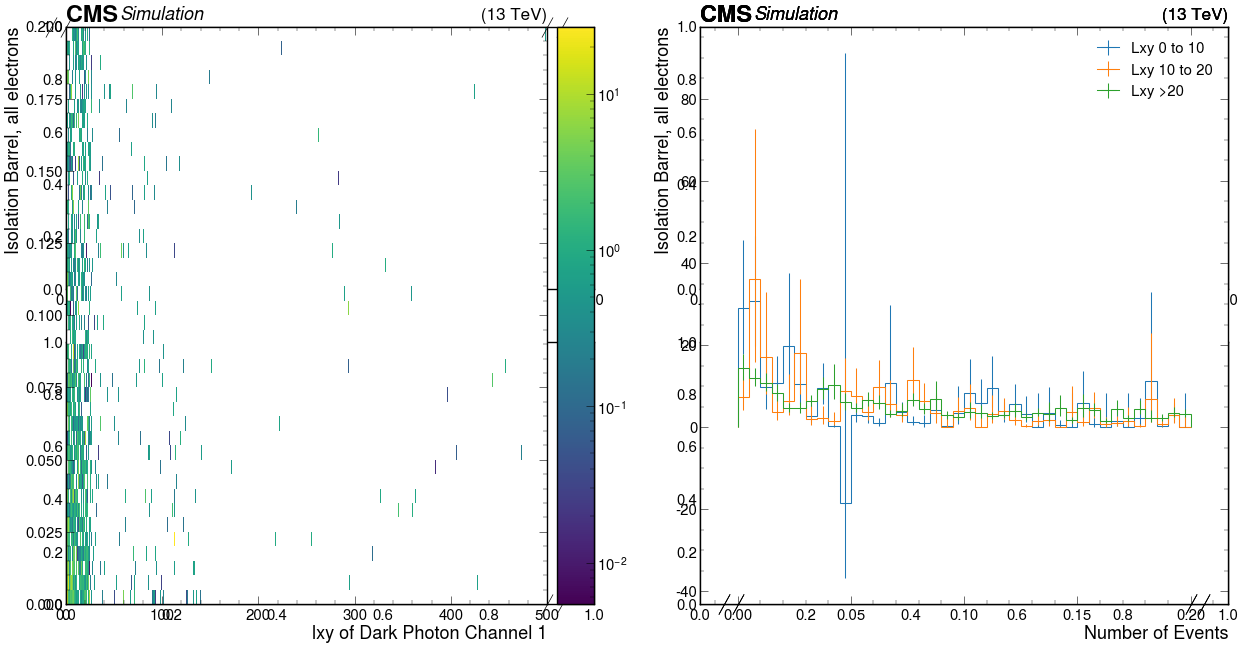

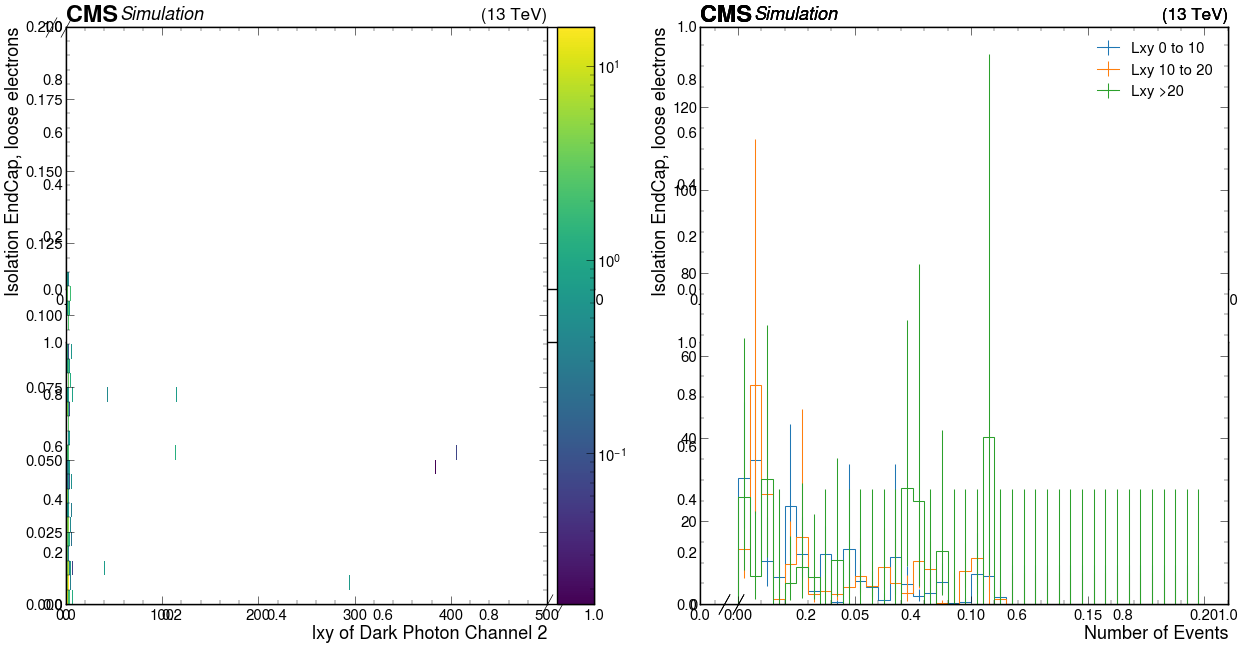

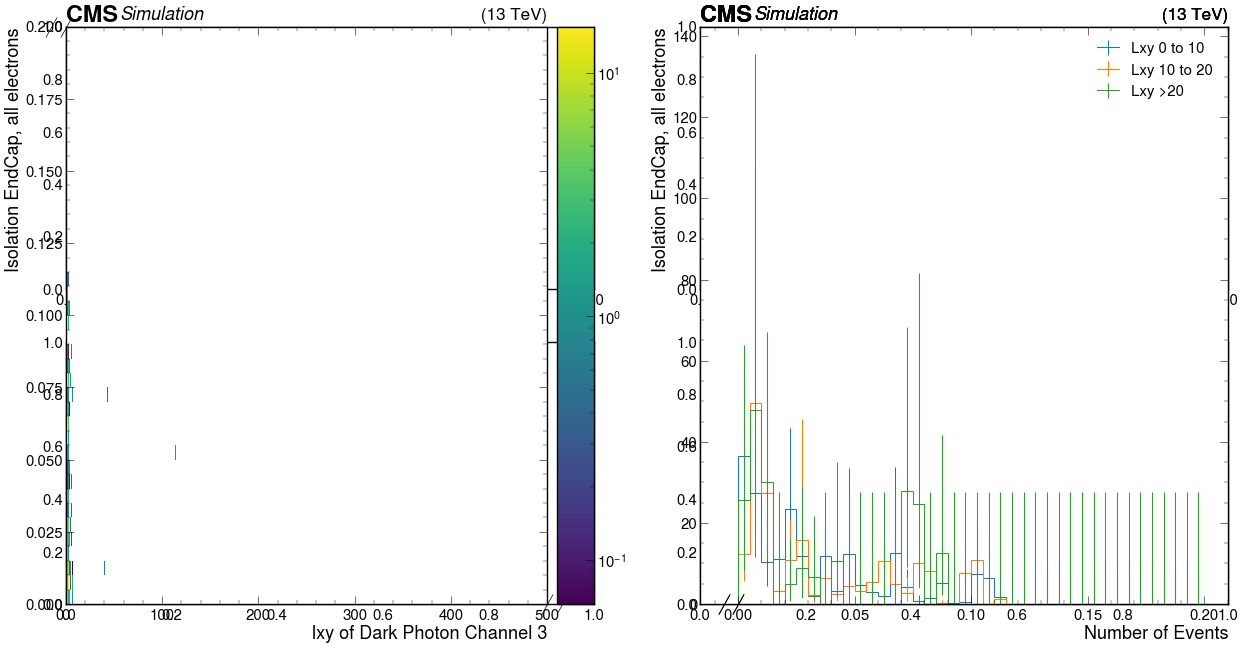

In [39]:
plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[0], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 0")
plt.ylabel("Isolation Barrel, loose electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[0],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True,flow='none')
utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[0],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True,flow='none')
utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[0],slice(4,101, sum),:], label = "Lxy >20" ,density=True,flow='none')
plt.legend()
#print(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[0],slice(0, 2, sum),:]) 
plt.ylabel("Number of Events")
plt.xlabel("Isolation Barrel, loose electrons")

plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[1], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("Isolation Barrel, all electrons")

plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[1],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True)
utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[1],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True)
utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[1],slice(4,101, sum),:], label = "Lxy >20" ,density=True)
plt.legend() 
print(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[1],slice(3, 101, sum),:22])   
plt.xlabel("Number of Events")
plt.ylabel("Isolation Barrel, all electrons")

plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[2], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 2")
plt.ylabel("Isolation EndCap, loose electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[2],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True)
utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[2],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True)
utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[2],slice(4,101, sum),:], label = "Lxy >20" ,density=True)
plt.legend() 
#print(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[2],slice(3, 101, sum),:])   
plt.xlabel("Number of Events")
plt.ylabel("Isolation EndCap, loose electrons")

plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[3], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 3")
plt.ylabel("Isolation EndCap, all electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[3],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True)
utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[3],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True)
utilities.plot(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[3],slice(4,101, sum),:], label = "Lxy >20" ,density=True)
plt.legend() 
#print(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[3],slice(3, 101, sum),:])   
plt.xlabel("Number of Events")
plt.ylabel("Isolation EndCap, all electrons")

(hists["electron_GsfEleRelPFIsoScaledCut2d"][channels[0],slice(0, 2, sum),:])

# σiηiη:

shower shape variable, defined as the energy-weighted standard deviation of
a single crystal eta within the 5 × 5 crystals centered at the crystal with maximum
energy.

                              ┌──────────────────────────────────────────────┐
[     -inf,         0) 0      │                                              │
[        0, 0.0003333) 2.286  │█▋                                            │
[0.0003333, 0.0006667) 0      │                                              │
[0.0006667,     0.001) 0      │                                              │
[    0.001,  0.001333) 0      │                                              │
[ 0.001333,  0.001667) 0      │                                              │
[ 0.001667,     0.002) 0      │                                              │
[    0.002,  0.002333) 0      │                                              │
[ 0.002333,  0.002667) 0      │                                              │
[ 0.002667,     0.003) 0      │                                              │
[    0.003,  0.003333) 0      │                                              │
[ 0.003333,  0.003667) 0      │                     

Hist(Regular(60, 0, 0.02, name='electron_GsfEleFull5x5SigmaIEtaIEtaCut'), storage=Weight()) # Sum: WeightedSum(value=241.675, variance=369.687)

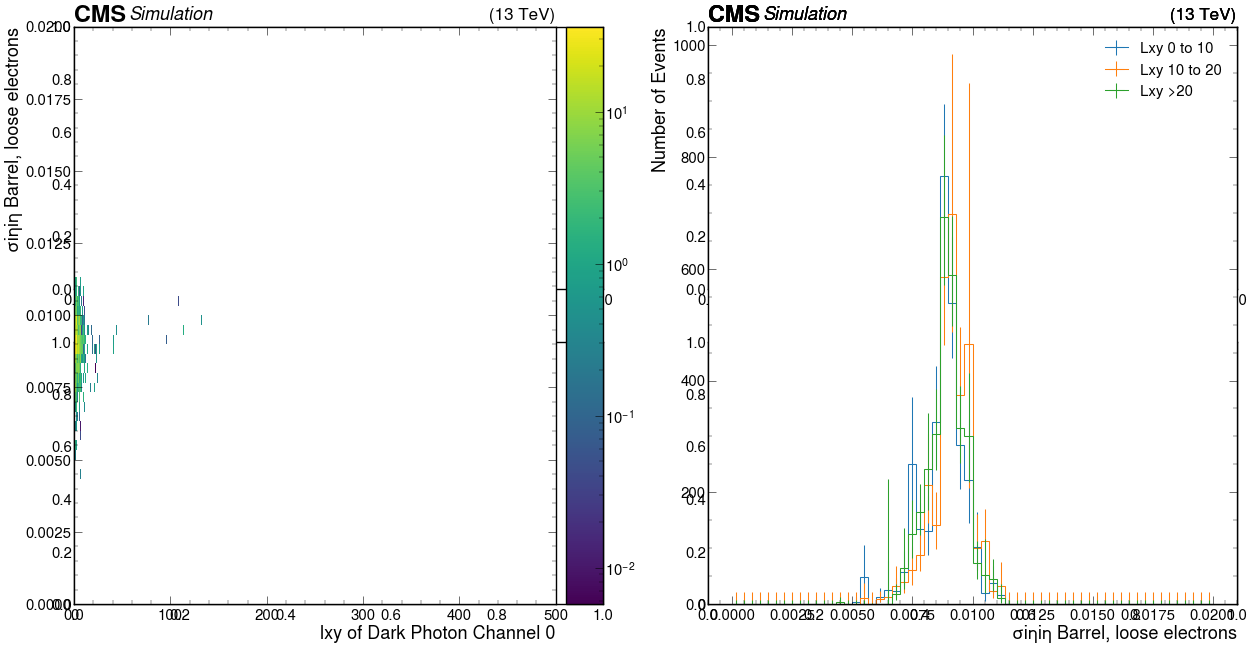

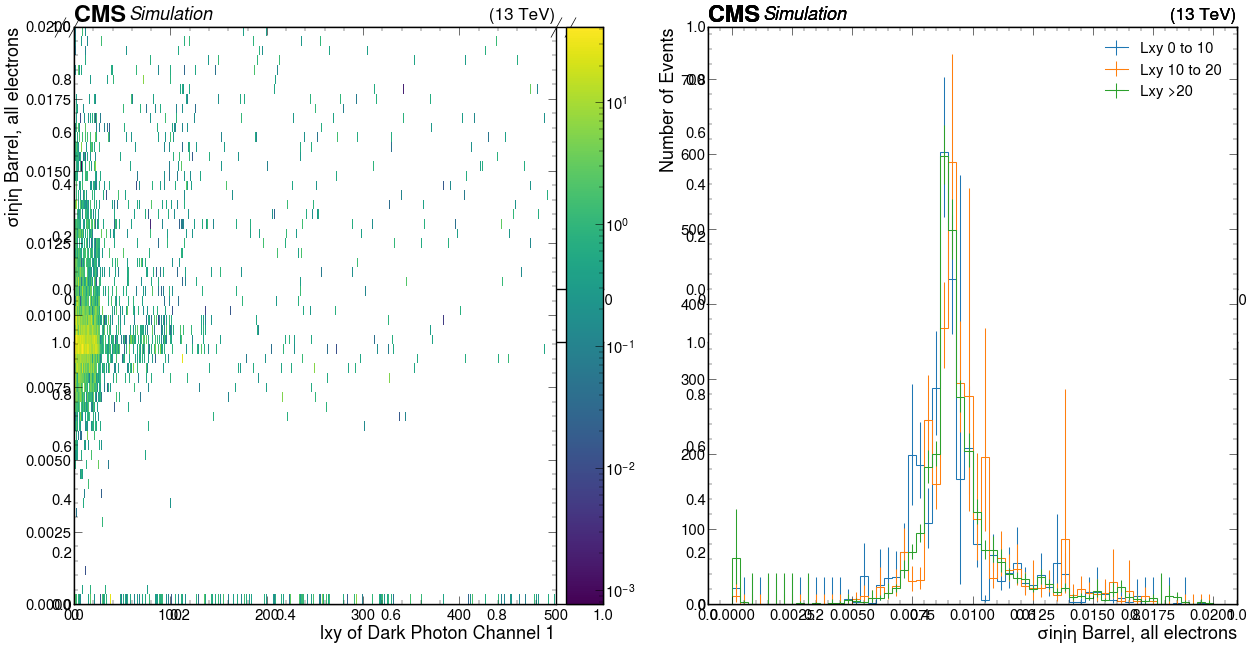

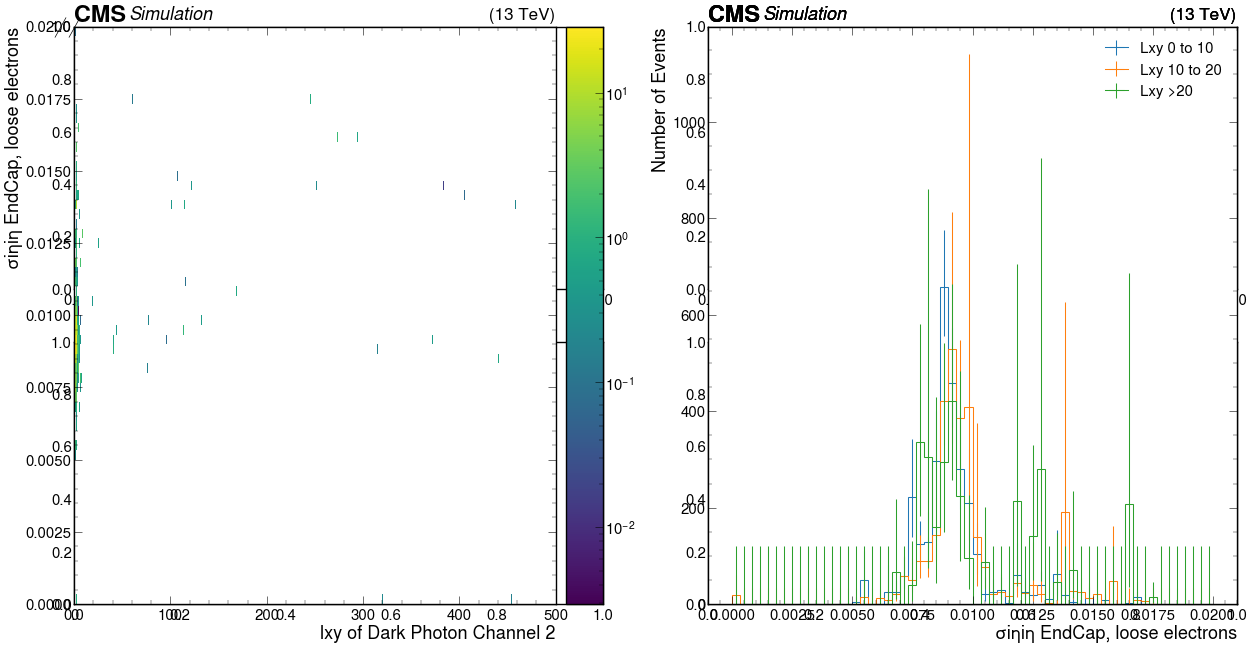

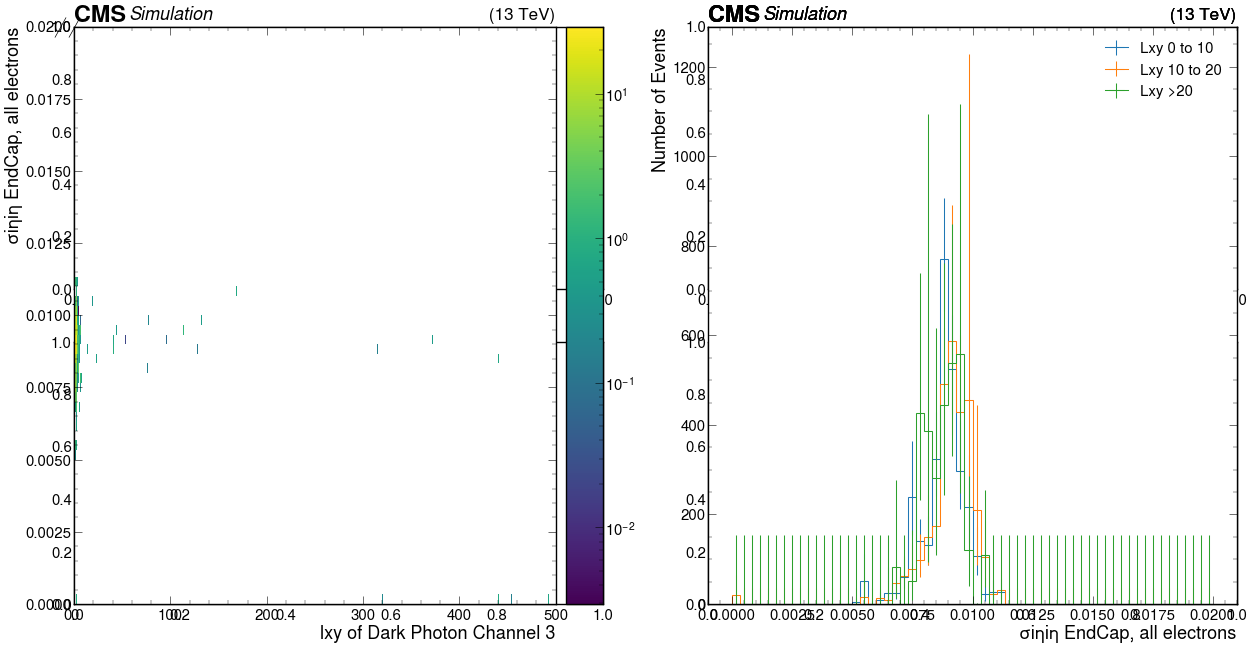

In [7]:
plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[0], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 0")
plt.ylabel("σiηiη Barrel, loose electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[0],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True,flow='none')
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[0],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True,flow='none')
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[0],slice(4,101, sum),:], label = "Lxy >20" ,density=True,flow='none')
plt.legend()
#print(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[0],slice(0, 2, sum),:35]) 
plt.ylabel("Number of Events")
plt.xlabel("σiηiη Barrel, loose electrons")

plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[1], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("σiηiη Barrel, all electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[1],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True,flow='none')
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[1],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True,flow='none')
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[1],slice(4,101, sum),:], label = "Lxy >20" ,density=True,flow='none')
plt.legend()  
print(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[1],slice(0, 2, sum),:35]) 
plt.ylabel("Number of Events")
plt.xlabel("σiηiη Barrel, all electrons")

plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[2], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 2")
plt.ylabel("σiηiη EndCap, loose electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[2],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True,flow='none')
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[2],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True,flow='none')
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[2],slice(4,101, sum),:], label = "Lxy >20" ,density=True,flow='none')
plt.legend() 
#print(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[2],slice(0, 2, sum),:35]) 
plt.ylabel("Number of Events")
plt.xlabel("σiηiη EndCap, loose electrons")

plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[3], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 3")
plt.ylabel("σiηiη EndCap, all electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[3],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True,flow='none')
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[3],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True,flow='none')
utilities.plot(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[3],slice(4,101, sum),:], label = "Lxy >20" ,density=True,flow='none')
plt.legend() 
#print(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[3],slice(0, 2, sum),:35]) 
plt.ylabel("Number of Events")
plt.xlabel("σiηiη EndCap, all electrons")


(hists["electron_GsfEleFull5x5SigmaIEtaIEtaCut2d"][channels[0],slice(0, 2, sum),:])

# Conversion veto: 

veto designed to identify electrons from photon conversions. A simple test to determine whether an electron fails or passes through the ID in an event. 

                   ┌─────────────────────────────────────────────────────────┐
[-inf,   0) 0      │                                                         │
[   0,   1) 0.7857 │▏                                                        │
[   1, inf) 314.8  │████████████████████████████████████████████████████████ │
                   └─────────────────────────────────────────────────────────┘


Hist(Regular(2, 0, 2, name='electron_GsfEleConversionVetoCut'), storage=Weight()) # Sum: WeightedSum(value=241.675, variance=369.687)

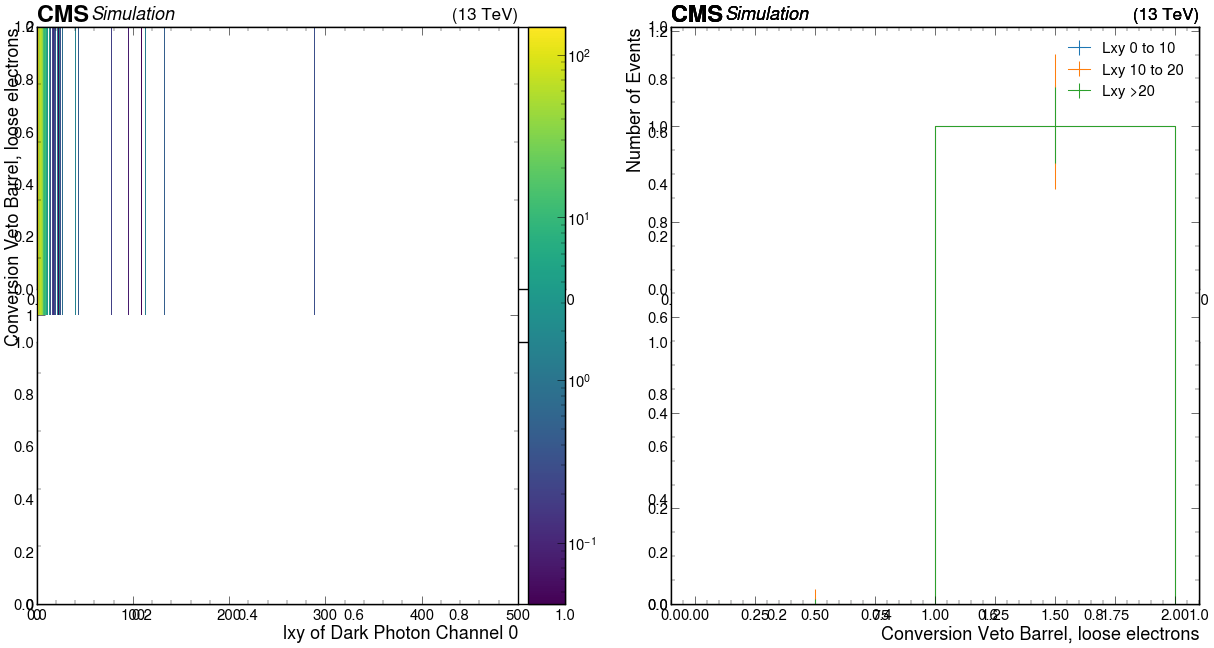

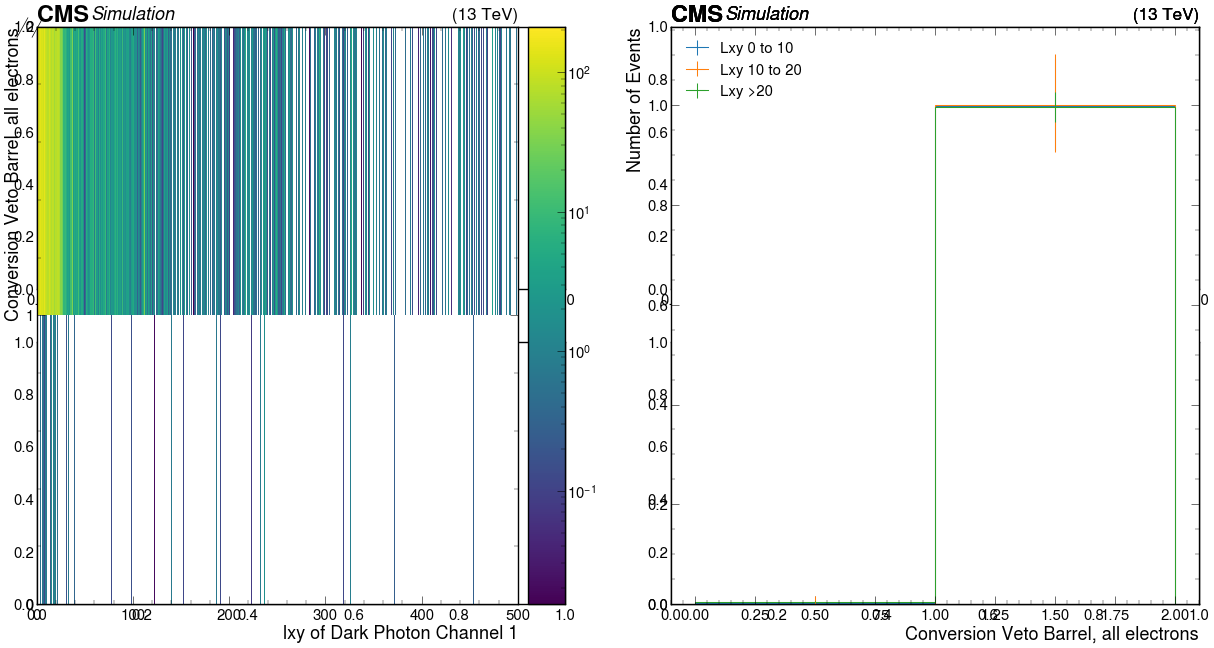

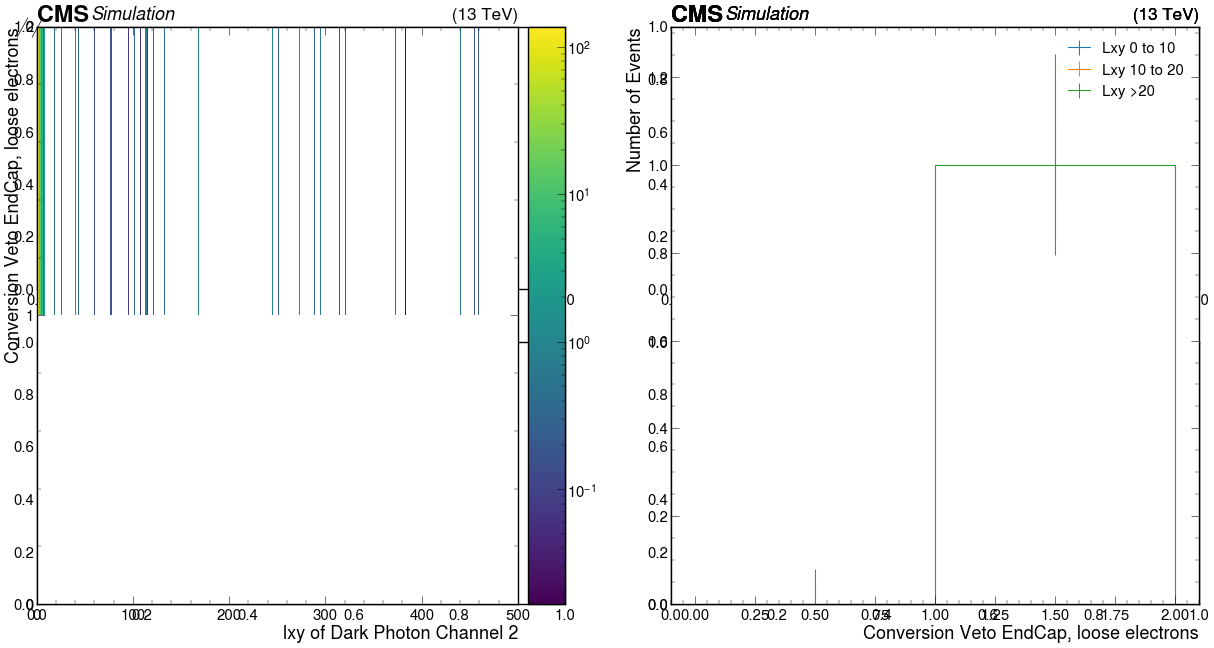

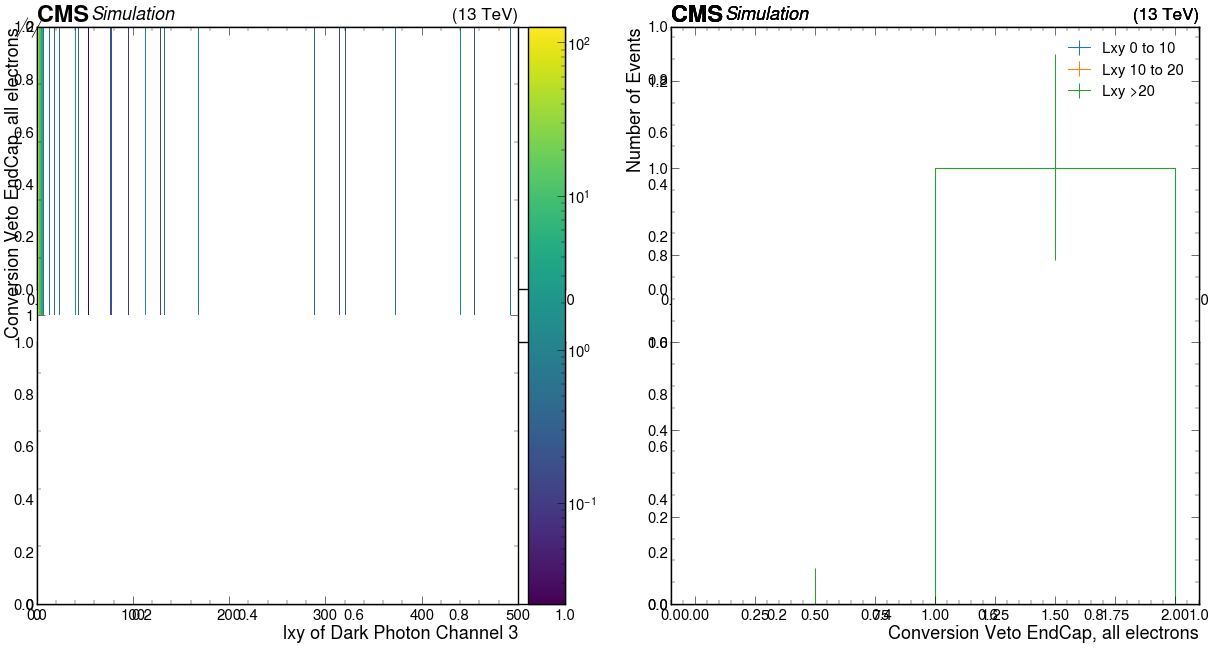

In [8]:
plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[0], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 0")
plt.ylabel("Conversion Veto Barrel, loose electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[0],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True,flow='none')
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[0],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True,flow='none')
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[0],slice(4,101, sum),:], label = "Lxy >20" ,density=True,flow='none')
plt.legend()
#print(hists["electron_GsfEleConversionVetoCut2d"][channels[0],slice(0, 2, sum),:1]) 
plt.ylabel("Number of Events")
plt.xlabel("Conversion Veto Barrel, loose electrons")

plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[1], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("Conversion Veto Barrel, all electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[1],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True,flow='none')
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[1],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True,flow='none')
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[1],slice(4,101, sum),:], label = "Lxy >20" ,density=True,flow='none')
plt.legend()  
print(hists["electron_GsfEleConversionVetoCut2d"][channels[1],slice(0, 2, sum),:1]) 
plt.ylabel("Number of Events")
plt.xlabel("Conversion Veto Barrel, all electrons")

plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[2], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 2")
plt.ylabel("Conversion Veto EndCap, loose electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[2],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True,flow='none')
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[2],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True,flow='none')
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[2],slice(4,101, sum),:], label = "Lxy >20" ,density=True,flow='none')
plt.legend() 
#print(hists["electron_GsfEleConversionVetoCut2d"][channels[2],slice(0, 2, sum),:1]) 
plt.ylabel("Number of Events")
plt.xlabel("Conversion Veto EndCap, loose electrons")

plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[3], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 3")
plt.ylabel("Conversion Veto EndCap, all electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[3],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True,flow='none')
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[3],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True,flow='none')
utilities.plot(hists["electron_GsfEleConversionVetoCut2d"][channels[3],slice(4,101, sum),:], label = "Lxy >20" ,density=True,flow='none')
plt.legend() 
#print(hists["electron_GsfEleConversionVetoCut2d"][channels[3],slice(0, 2, sum),:1]) 
plt.ylabel("Number of Events")
plt.xlabel("Conversion Veto EndCap, all electrons")


(hists["electron_GsfEleConversionVetoCut2d"][channels[0],slice(0, 2, sum),:])

# H/E:

ratio of the energy deposited in the single closest HCAL tower to the supercluster position inside a cone of ∆R = 0.15 in the (η, φ) plane to the energy deposited at ECAL.

                     ┌───────────────────────────────────────────────────────┐
[ -inf,     0) 0     │                                                       │
[    0, 0.005) 1589  │██████████████████████████████████████████████████████ │
[0.005,  0.01) 13.65 │▌                                                      │
[ 0.01, 0.015) 52.3  │█▊                                                     │
[0.015,  0.02) 71.65 │██▍                                                    │
[ 0.02, 0.025) 64.15 │██▏                                                    │
[0.025,  0.03) 84.13 │██▉                                                    │
[ 0.03, 0.035) 48.97 │█▋                                                     │
[0.035,  0.04) 51.33 │█▊                                                     │
[ 0.04, 0.045) 38.51 │█▎                                                     │
[0.045,  0.05) 31.95 │█▏                                                     │
[ 0.05, 0.055) 35.72 │█▎                            

Text(0, 1, 'H/E')

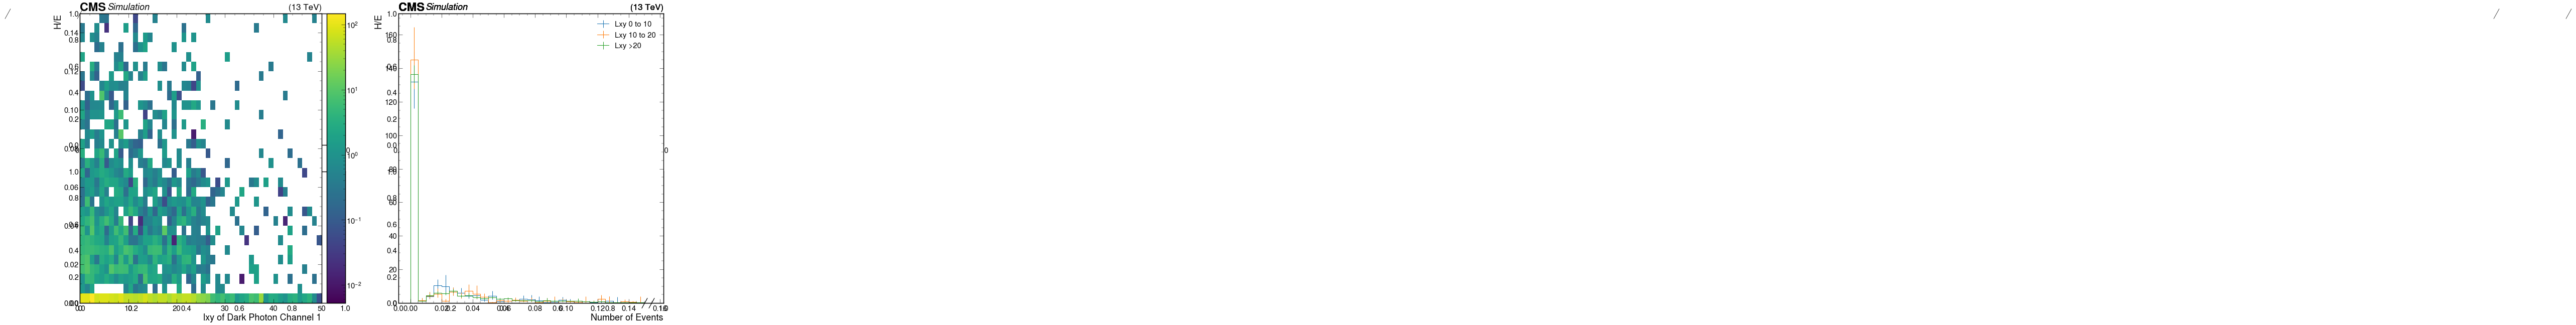

In [9]:
#hists = out[sample]["hists"]
plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleHadronicOverEMEnergyScaledCut2d"][channels[1], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("H/E")
plt.xlim(0,50)
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleHadronicOverEMEnergyScaledCut2d"][channels[1],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True)
utilities.plot(hists["electron_GsfEleHadronicOverEMEnergyScaledCut2d"][channels[1],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True)
utilities.plot(hists["electron_GsfEleHadronicOverEMEnergyScaledCut2d"][channels[1],slice(4,101, sum),:], label = "Lxy >20" ,density=True)
plt.legend() 
print(hists["electron_GsfEleHadronicOverEMEnergyScaledCut2d"][channels[1],slice(3, 101, sum),:])   
plt.xlabel("Number of Events")
plt.ylabel("H/E")

# Expected missing inner hits:

number of missing hits expected for GSF track.

                    ┌────────────────────────────────────────────────────────┐
[-inf,   2) 311.9   │███████████████████████████████████████████████████████ │
[   2,   3) 3.529   │▋                                                       │
[   3,   4) 0.09123 │                                                        │
[   4,   5) 0       │                                                        │
[   5,   6) 0       │                                                        │
[   6,   7) 0       │                                                        │
[   7,   8) 0       │                                                        │
[   8,   9) 0       │                                                        │
[   9,  10) 0       │                                                        │
[  10, inf) 0       │                                                        │
                    └────────────────────────────────────────────────────────┘


Hist(Regular(10, 0, 10, name='electron_GsfEleMissingHitsCut'), storage=Weight()) # Sum: WeightedSum(value=241.675, variance=369.687)

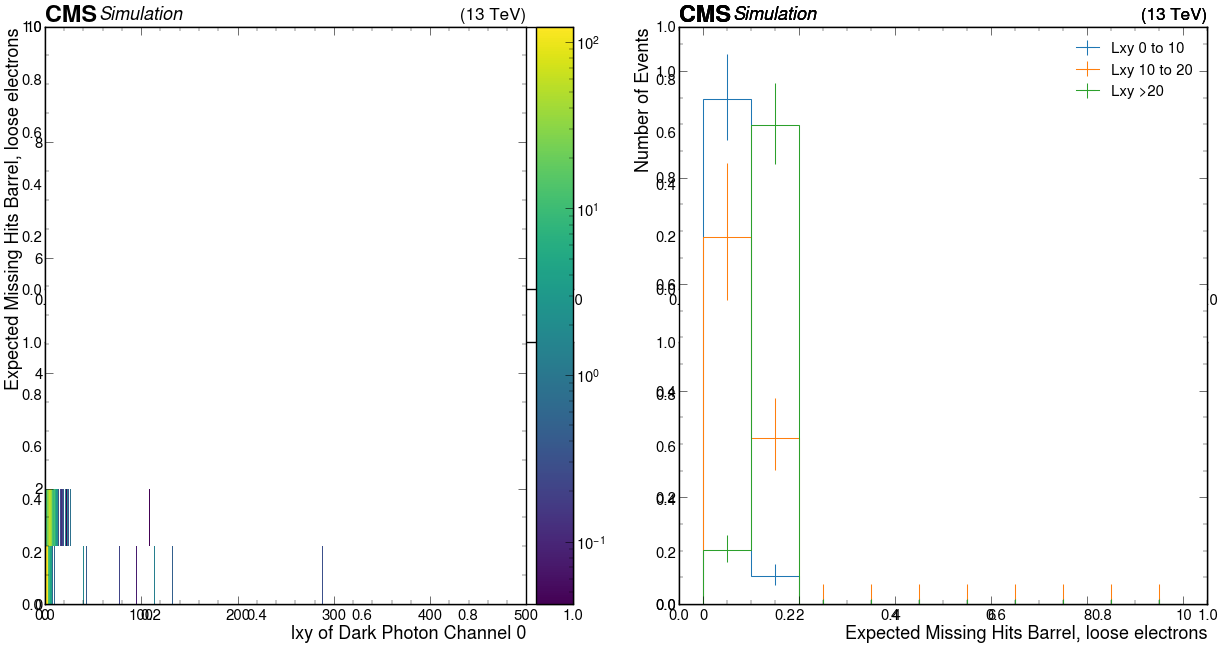

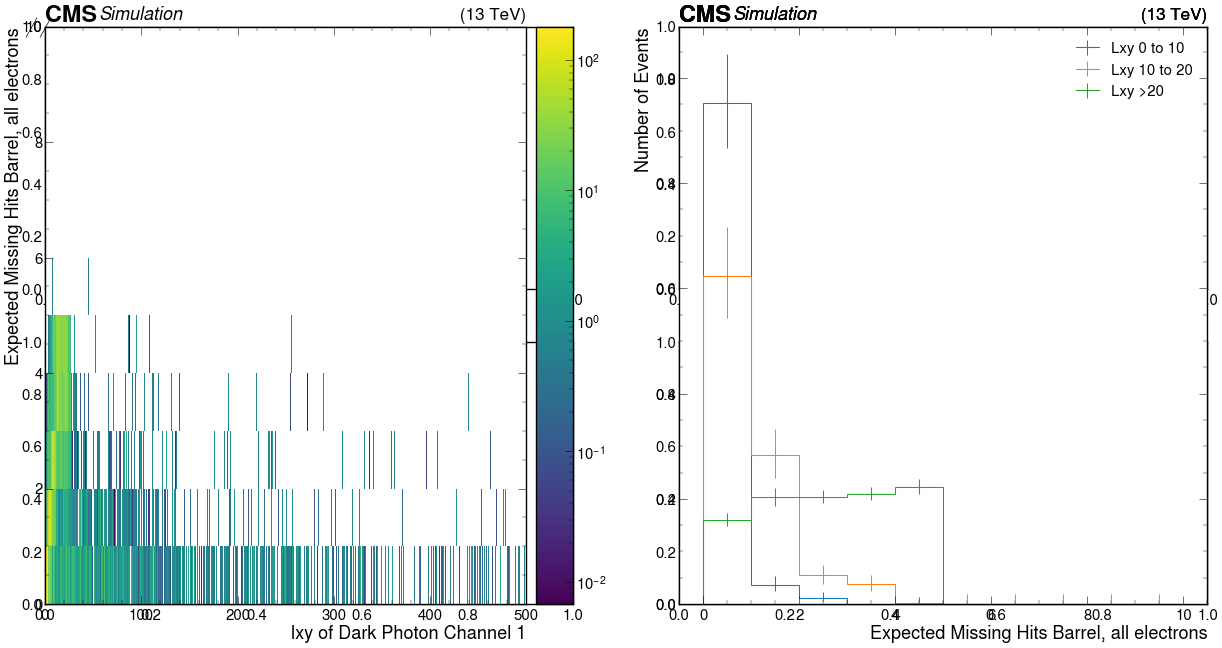

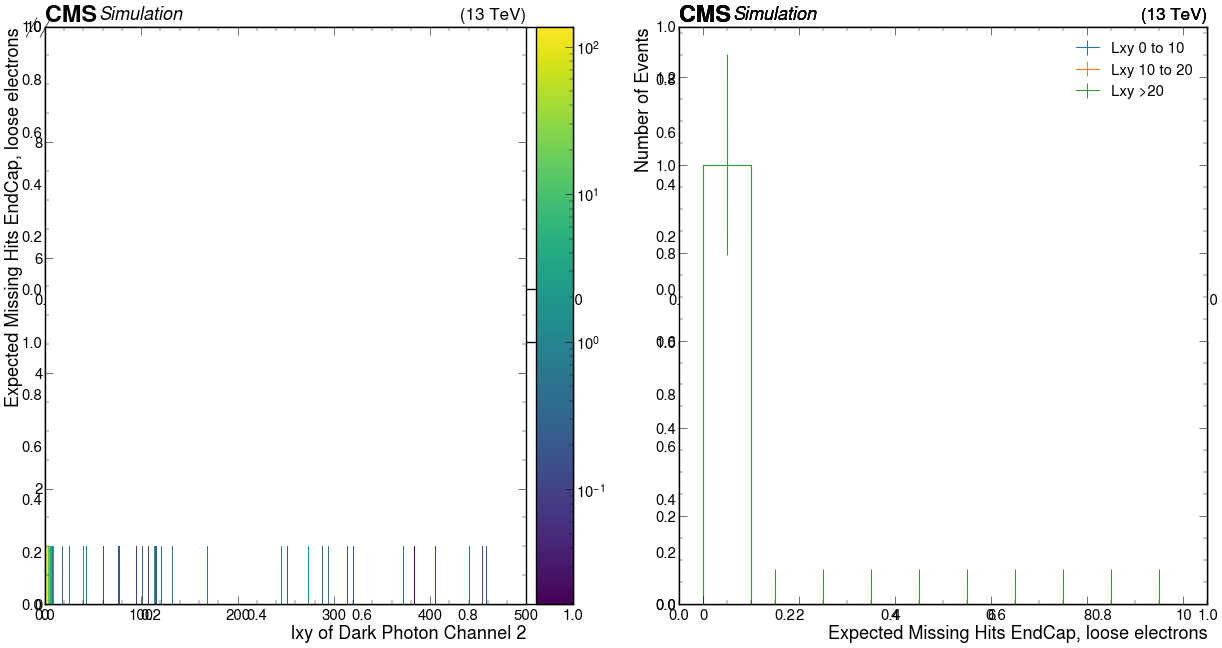

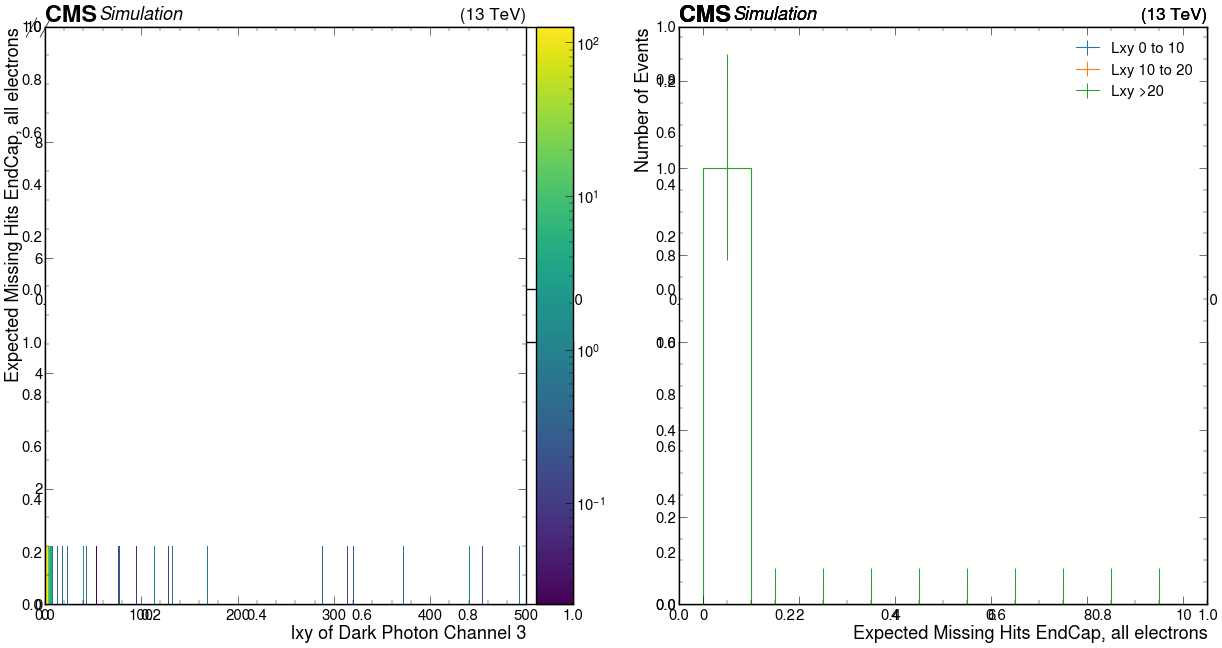

In [10]:
plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[0], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 0")
plt.ylabel("Expected Missing Hits Barrel, loose electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[0],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True,flow='none')
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[0],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True,flow='none')
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[0],slice(4,101, sum),:], label = "Lxy >20" ,density=True,flow='none')
plt.legend()
#print(hists["electron_GsfEleMissingHitsCut2d"][channels[0],slice(0, 2, sum),2:]) 
plt.ylabel("Number of Events")
plt.xlabel("Expected Missing Hits Barrel, loose electrons")

plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[1], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 1")
plt.ylabel("Expected Missing Hits Barrel, all electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[1],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True,flow='none')
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[1],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True,flow='none')
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[1],slice(4,101, sum),:], label = "Lxy >20" ,density=True,flow='none')
plt.legend()  
print(hists["electron_GsfEleMissingHitsCut2d"][channels[1],slice(0, 2, sum),2:]) 
plt.ylabel("Number of Events")
plt.xlabel("Expected Missing Hits Barrel, all electrons")

plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[2], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 2")
plt.ylabel("Expected Missing Hits EndCap, loose electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[2],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True,flow='none')
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[2],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True,flow='none')
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[2],slice(4,101, sum),:], label = "Lxy >20" ,density=True,flow='none')
plt.legend() 
#print(hists["electron_GsfEleMissingHitsCut2d"][channels[2],slice(0, 2, sum),2:]) 
plt.ylabel("Number of Events")
plt.xlabel("Expected Missing Hits EndCap, loose electrons")

plt.subplots(2, 2, figsize=(30,15))
plt.subplot(1, 2, 1)
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[3], :, :], label = sample, norm=mpl.colors.LogNorm())
plt.xlabel("lxy of Dark Photon Channel 3")
plt.ylabel("Expected Missing Hits EndCap, all electrons")
plt.subplot(1, 2, 2)
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[3],slice(0, 2, sum),:], label = "Lxy 0 to 10",density=True,flow='none')
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[3],slice(2,4, sum),:], label = "Lxy 10 to 20",density=True,flow='none')
utilities.plot(hists["electron_GsfEleMissingHitsCut2d"][channels[3],slice(4,101, sum),:], label = "Lxy >20" ,density=True,flow='none')
plt.legend() 
#print(hists["electron_GsfEleMissingHitsCut2d"][channels[3],slice(0, 2, sum),2:]) 
plt.ylabel("Number of Events")
plt.xlabel("Expected Missing Hits EndCap, all electrons")


(hists["electron_GsfEleMissingHitsCut2d"][channels[0],slice(0, 2, sum),:])

# Percentages Failed

In [38]:
binnumdict = {
    "electron_GsfEleDEtaInSeedCut2d": 35 ,
    "electron_GsfEleDPhiInCut2d" : 76 ,
    "electron_GsfEleEInverseMinusPInverseCut2d" : 53 ,
    "electron_GsfEleFull5x5SigmaIEtaIEtaCut2d" : 35 ,
    "electron_GsfEleRelPFIsoScaledCut2d" : 22 ,
    "electron_GsfEleConversionVetoCut2d" : 1,
    "electron_GsfEleMissingHitsCut2d" : 3,
}
#binnum come from the bin number assigned in hist.py (about half), and are specifically determined from the analysis note number for each ID variable

lxy = [0,2,3,4,5,6,7,102]
#able to change Lxy
hists =  output["out"]["2Mu2E_100GeV_5GeV_400mm"]["hists"]
for histname, binnum in binnumdict.items() : 
    values = output["out"]["2Mu2E_100GeV_5GeV_400mm"]["hists"][histname][channels[1],:,:].values(flow=True)
    print()
    print(histname)
    for i in range(0,len(lxy)-1):
# Add up all electrons in that lxy range 
        total = values[lxy[i]:lxy[i+1],:].sum()
  # Add up all electrons in that lxy range that are in a bin greater than binnum
        if histname == "electron_GsfEleConversionVetoCut2d" :
            fail = values[lxy[i]:lxy[i+1],binnum].sum()
        else: 
            fail = values[lxy[i]:lxy[i+1],binnum:].sum()
        rate = (fail/total)*100
        print(total, fail, rate)


electron_GsfEleDEtaInSeedCut2d
156.55410747230053 7.215287929400802 4.608814195869897
159.00091781560332 -6.016541443765163 -3.7839664867486316
212.485538180219 6.672757486114278 3.140334887381747
114.31954988650978 12.993574813008308 11.366012922468311
136.80452329758555 8.793109122663736 6.427498821465449
119.94359673466533 13.561832690611482 11.306841765477863
2054.547182035574 456.99200748145813 22.242955113286143

electron_GsfEleDPhiInCut2d
156.55410747230053 4.108580999076366 2.6243840327238344
159.00091781560332 3.2669224962592125 2.0546563762908154
212.485538180219 5.700883768731728 2.6829514222735193
114.31954988650978 10.972754374146461 9.59831838477287
136.80452329758555 1.5801331289112568 1.1550298855791885
119.94359673466533 4.349995961412787 3.6267012828001843
2054.547182035574 251.25383644830436 12.229158748224549

electron_GsfEleEInverseMinusPInverseCut2d
156.55410747230053 2.36472749710083 1.51048575810713
159.00091781560332 1.7825888991355896 1.121118622222606
212.48